## Final Project Submission

Please fill out:
* Student name: Samuel Marder
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Matt Bombard
* Blog post URL:


# Overview

# Business Understanding

Century 21 is looking to expand its housing footprint. This would be made a lot easier having a regression model to work from

# Data Understanding

* We have data from several recent sales of houses including when the house built, sqft of the lot and of the living space
* This data is suitable for regression because we have multiple features that could be useful to a model such as year built, waterfront view, and more


# Data Analysis

In [1]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np

df = pd.read_csv("data/kc_house_data.csv", index_col="id")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [3]:
relevant_cols = [
    "price",
    "bedrooms",		# Number of bedrooms
    "bathrooms",	# Number of bathrooms
    "sqft_living",	# Square foot of living space
    "sqft_lot",		# Square foot of the lot
    "floors",		# Number of floors
    "waterfront",	# If there is a waterfront view
    "condition",	# How good the overall condition of the house is
    "grade",		# Overall grade of the house
    "yr_built"]		# Year the house was built in

df = df[relevant_cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.8+ MB


Test for nulls first to see if we can impute the missing values

In [4]:
print(df.isna().sum())

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64


Impute a value for null that makes sense for the waterfront column

In [5]:
df['waterfront'].fillna(value="NO", inplace=True)
print(df.isna().sum())

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64


C:\Users\smard\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Taking a look to see what values we are dealing with in these columns

In [6]:
print(df.condition.value_counts())
print()
print(df.waterfront.value_counts())
print()
print(df.grade.value_counts())

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

NO     21451
YES      146
Name: waterfront, dtype: int64

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


Impute as numbers for waterfront and condition

In [7]:
def waterfront_to_num(wf):
    if wf == "YES":
        return 1
    elif wf == "NO":
        return 0
    else:
        return wf

def condition_to_num(condition):
    if condition == "Average":
        return 3
    elif condition == "Good":
        return 4
    elif condition == "Very Good":
        return 5
    elif condition == "Fair":
        return 2
    elif condition == "Poor":
        return 1
    else:
        return condition

In [8]:
df.loc[:, 'waterfront'] = df.waterfront.apply(waterfront_to_num)

df.loc[:, 'condition'] = df.condition.apply(condition_to_num)

df['grade'].replace(to_replace=r'\D', value=r'', regex=True, inplace=True)
df.loc[:, 'grade'] = df["grade"].astype(int)

print(df.condition.value_counts())
print()
print(df.waterfront.value_counts())
print()
print(df.grade.value_counts())

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

C:\Users\smard\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\smard\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(




0    21451
1      146
Name: waterfront, dtype: int64

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


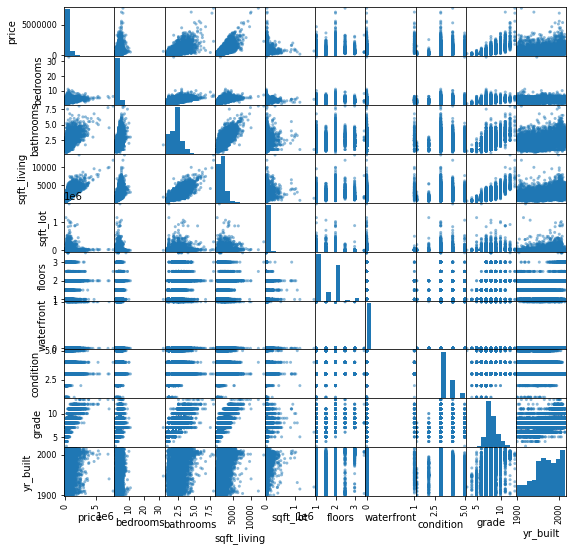

In [9]:
pd.plotting.scatter_matrix(df,figsize  = [9, 9]);

In [28]:
df['grade_x_sqft_living'] = df['grade'] * np.log(df['sqft_living'])
df.corr()

<ipython-input-28-b62b7df8e41d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_x_sqft_living'] = df['grade'] * np.log(df['sqft_living'])


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,grade_x_sqft_living,log_price
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.053953,0.703672,0.891745
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670,0.442745,0.343360
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173,0.725578,0.551249
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152,0.864936,0.695185
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946,0.135561,0.100025
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193,0.452060,0.310630
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487,0.090636,0.170720
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592,-0.128083,0.038918
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865,0.982838,0.703720
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000,0.435561,0.080583


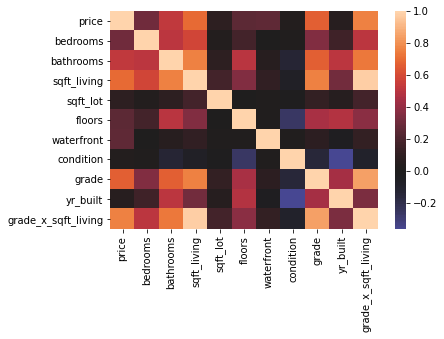

In [11]:
sns.heatmap(df.corr(), center=0);

In [12]:
f = "price~sqft_living"
baseline_model = ols(formula=f, data=df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:24:49   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
f = "price~grade_x_sqft_living"
model_two = ols(formula=f, data=df).fit()
model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 2.118e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:32:48   Log-Likelihood:            -3.0001e+05
No. Observations:               21597   AIC:                         6.000e+05
Df Residuals:                   21595   BIC:                         6.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7.434e+05   8997.299    -82.620      0.000   -7.61e+05   -7.26e+05
grade_x_sqft_living  2.206e+04    151.570    145.535      0.000    2.18e+04    2.24e+04
==============================================================================
Omnibus:                    19627.777   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2000584.333
Skew:                           3.995   Prob(JB):                         0.00
Kurtosis:                      49.469   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

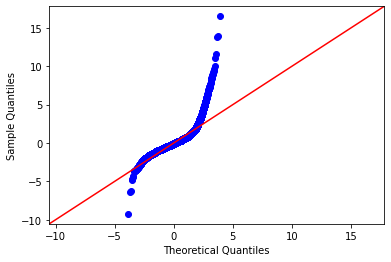

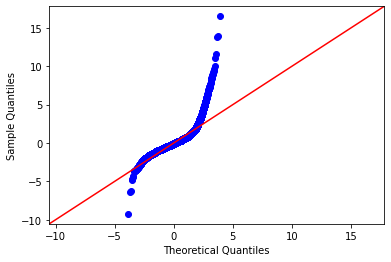

In [14]:
sm.graphics.qqplot(model_two.resid, dist=stats.norm, line='45', fit=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

df["log_price"] = np.log(df['price'])

<ipython-input-15-dbb778e0f6f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_price"] = np.log(df['price'])


In [33]:
f = "log_price~grade_x_sqft_living"
model_three = ols(formula=f, data=df).fit()
model_three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                 2.551e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:33:00   Log-Likelihood:                -8370.7
No. Observations:               21597   AIC:                         1.675e+04
Df Residuals:                   21595   BIC:                         1.676e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.1241      0.012    905.178      0.000      11.100      11.148
grade_x_sqft_living     0.0331      0.000    159.710      0.000       0.033       0.033
==============================================================================
Omnibus:                       88.050   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.083
Skew:                           0.157   Prob(JB):                     4.53e-20
Kurtosis:                       2.982   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

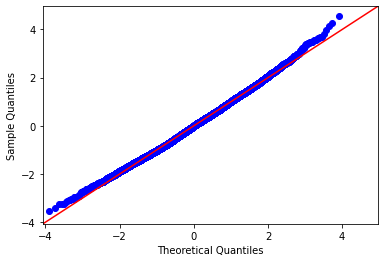

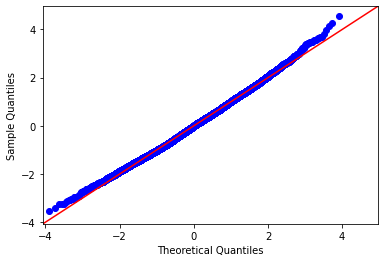

In [34]:
sm.graphics.qqplot(model_three.resid, dist=stats.norm, line='45', fit=True)

In [40]:
f = "log_price~grade_x_sqft_living+bathrooms+floors"
model_four = ols(formula=f, data=df).fit()
model_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     8561.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:34:54   Log-Likelihood:                -8329.7
No. Observations:               21597   AIC:                         1.667e+04
Df Residuals:                   21593   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.1576      0.013    868.415      0.000      11.132      11.183
grade_x_sqft_living     0.0322      0.000    106.049      0.000       0.032       0.033
bathrooms               0.0348      0.005      7.297      0.000       0.025       0.044
floors                 -0.0379      0.005     -7.225      0.000      -0.048      -0.028
==============================================================================
Omnibus:                       82.130   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.008
Skew:                           0.151   Prob(JB):                     9.44e-19
Kurtosis:                       2.968   Cond. No.                         318.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

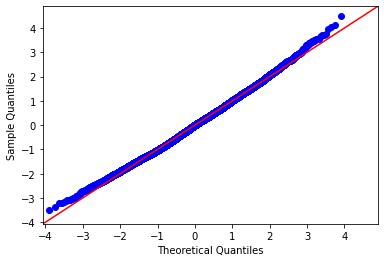

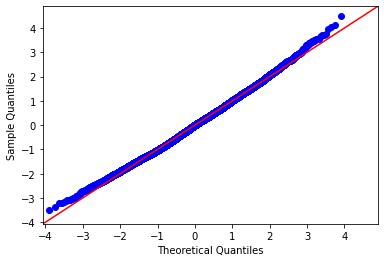

In [41]:
sm.graphics.qqplot(model_four.resid, dist=stats.norm, line='45', fit=True)

In [19]:
def regress(X, y, random=42448):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('Train Mean Squarred Error:', train_mse)
    print('Test Mean Squarred Error:', test_mse)
    print('R Score:', linreg.score(X_test, y_test))

In [20]:
X = df[["sqft_living", "grade"]]
y = df["price"]
regress(X, y)

Train Mean Squarred Error: 61665772743.780365
Test Mean Squarred Error: 66249932720.37717
R Score: 0.5271745202577509


In [21]:
X = df[["grade_x_sqft_living"]]
y = df["log_price"]
regress(X, y)

Train Mean Squarred Error: 0.13579226708014425
Test Mean Squarred Error: 0.1315581503290109
R Score: 0.5132956560273321


In [37]:
X = df[["grade_x_sqft_living", "bathrooms", "bedrooms"]]
y = df["log_price"]
regress(X, y)

Train Mean Squarred Error: 0.12740987887391456
Test Mean Squarred Error: 0.1253563931317211
R Score: 0.5362392909190966


In [39]:
X = df.drop(["price", "log_price"], axis = 1)
y = df["price"]
regress(X, y)

Train Mean Squarred Error: 45731986768.90319
Test Mean Squarred Error: 49354793168.28508
R Score: 0.6477550572636867
